## Email Spam Classification Project

### Objective:
This project aims to build a robust email spam classification system capable of identifying and filtering spam emails from legitimate ones. We will use a publicly available email dataset that includes key information such as the sender, receiver, email subject, body text, and spam labels. The goal is to analyze the dataset, apply appropriate machine learning techniques, and develop a model that accurately predicts whether an email is spam or not.

### Features:
- **Sender & Receiver Information**: Identify patterns in sender and receiver data.
- **Email Subject**: Extract insights from the subject line for classification.
- **Email Body**: Analyze the content of the email to detect potential spam.
- **Spam Label**: Use this label as a target for training the classification model.

The project will explore various machine learning algorithms, preprocessing techniques, and feature engineering methods to ensure high accuracy in spam detection.

### Importing Required Libraries

In [7]:
# Data handling libraries
import pandas as pd  # For data manipulation and analysis (working with DataFrames)
import numpy as np  # For numerical operations (e.g., working with arrays, random numbers)

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting and creating graphs (e.g., bar charts, scatter plots)
import seaborn as sns  # For enhanced and attractive visualizations (provides a high-level interface)

# Machine learning and evaluation libraries
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay  # For evaluating model performance

# Model saving libraries
import pickle  # For saving machine learning models in .pkl format (serialization)
import joblib  # For saving machine learning models in .joblib format (serialization)

# For Processing of text into vector format
from sklearn.feature_extraction.text import TfidfVectorizer

# Classifier libraries
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble models for classification (Random Forest, Gradient Boosting, AdaBoost)
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier

# Additional imports for reproducibility and data preprocessing
import random  # For generating random numbers in Python
from sklearn.preprocessing import StandardScaler  # For scaling data (feature scaling)

# For ignoring warnigns
import warnings
warnings.filterwarnings("ignore")

# For making tables
from prettytable import PrettyTable

### Importing Dataset

In [2]:
# Loading dataset
df = pd.read_csv("Dataset/Preprocessed Dataset/Preprocessed_Email_Dataset.csv")

print("Dataset is:\n")
print(df)

Dataset is:

     Unnamed: 0                                   From  \
0             0             contestinvite@codechef.com   
1             1          messages-noreply@linkedin.com   
2             2  messaging-digest-noreply@linkedin.com   
3             3                   no-reply@spotify.com   
4             4         jobalerts-noreply@linkedin.com   
..          ...                                    ...   
288         288               invitations@linkedin.com   
289         289                       user@techgig.com   
290         290                   technews@techgig.com   
291         291              no-reply@sgp.flipkart.com   
292         292                   technews@techgig.com   

                              From (name)  \
0                       Meg from CodeChef   
1                                LinkedIn   
2    ARUMULLA YASWANTH REDDY via LinkedIn   
3                                 Spotify   
4                     LinkedIn Job Alerts   
..                  

### Columns of the Dataset

In [3]:
print("Columns of the Dataset are:\n")

print(df.columns)

Columns of the Dataset are:

Index(['Unnamed: 0', 'From', 'From (name)', 'Subject', 'Email Text', 'spam',
       'no_reply', 'company', 'reason', 'Email Length'],
      dtype='object')


### Information about the Dataset

In [4]:
print("Information about the Dataset:\n")

print(df.info())

Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    293 non-null    int64 
 1   From          293 non-null    object
 2   From (name)   293 non-null    object
 3   Subject       291 non-null    object
 4   Email Text    293 non-null    object
 5   spam          293 non-null    int64 
 6   no_reply      293 non-null    int64 
 7   company       293 non-null    object
 8   reason        293 non-null    object
 9   Email Length  293 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 23.0+ KB
None


### Data types of the dataset

In [4]:
print("Data types of the Dataset are:\n")

print(df.dtypes)

Data types of the Dataset are:

Unnamed: 0       int64
From            object
From (name)     object
Subject         object
Email Text      object
spam             int64
no_reply         int64
company         object
reason          object
Email Length     int64
dtype: object


### Removing unnecessary columns

In [5]:
df = df.drop(columns = ["Unnamed: 0", "From"], axis = 1)

print("Columns of the Dataset are:\n")

print(df.columns)

Columns of the Dataset are:

Index(['From (name)', 'Subject', 'Email Text', 'spam', 'no_reply', 'company',
       'reason', 'Email Length'],
      dtype='object')


### Data types of the dataset

In [6]:
print("Data types of the Dataset are:\n")

print(df.dtypes)

Data types of the Dataset are:

From (name)     object
Subject         object
Email Text      object
spam             int64
no_reply         int64
company         object
reason          object
Email Length     int64
dtype: object


## Model Description

### **1. Logistic Regression**

- **Use Case**: Logistic Regression is a linear model for binary classification tasks, where the output is a probability score that can be mapped to two classes (0 or 1). It is commonly used for tasks such as email spam detection, fraud detection, and predicting customer churn.
  
- **Formula**: Logistic regression uses the sigmoid function to model the relationship between the input features and the target variable.
  
  \[
  P(y=1 | X) = \frac{1}{1 + e^{-z}}
  \]
  Where \(z\) is the linear combination of the input features:
  
  \[
  z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
  \]

- **Real-life Example**: 
  - **Email Spam Detection**: Logistic Regression is used to classify emails as either spam or not spam based on the content of the email (e.g., subject, body).
  - **Customer Churn Prediction**: Predicting whether a customer will leave a service based on past behavior.

---

### **2. Decision Tree**

- **Use Case**: Decision Trees are used for both classification and regression tasks. They model data by breaking it down into smaller subsets based on feature values. They are easy to interpret and are commonly used in scenarios such as loan approval or decision-making in customer service.

- **Formula**: Decision Trees do not use a fixed formula but rather split the data based on feature values. For classification, they aim to maximize information gain or minimize Gini impurity.

  - **Gini Impurity** for a node \(t\):
  \[
  Gini(t) = 1 - \sum_{i=1}^{k} p_i^2
  \]
  where \(p_i\) is the probability of class \(i\) in the node.

  - **Information Gain**:
  \[
  Gain(t) = Entropy(parent) - \sum \frac{|t_i|}{|parent|} Entropy(t_i)
  \]
  
- **Real-life Example**: 
  - **Loan Approval**: Based on attributes such as income, credit score, and debt-to-income ratio, a decision tree can predict whether a loan application should be approved or denied.
  - **Medical Diagnosis**: Predicting diseases based on symptoms or patient history.

---

### **3. Random Forest**

- **Use Case**: Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of the model. It is used for both classification and regression tasks. Random Forests are widely used for tasks like stock market prediction, medical diagnosis, and image classification.

- **Formula**: Random Forest builds multiple decision trees and aggregates their predictions (either by voting for classification or averaging for regression). Each tree is built using a random subset of data and features.

  - **Ensemble Prediction**:
  \[
  \hat{y} = \frac{1}{N} \sum_{i=1}^{N} \hat{y_i}
  \]
  where \(N\) is the number of trees and \(\hat{y_i}\) is the prediction of the \(i\)-th tree.

- **Real-life Example**: 
  - **Customer Segmentation**: Grouping customers into segments for targeted marketing based on their purchasing behavior.
  - **Fraud Detection**: Detecting fraudulent activities in financial transactions based on transaction history.

---

### **4. Support Vector Machine (SVM)**

- **Use Case**: Support Vector Machine is a supervised learning algorithm that is used for both classification and regression tasks. It works by finding a hyperplane that best separates the data into different classes. SVM is particularly effective in high-dimensional spaces and is commonly used in image classification, text classification, and bioinformatics.

- **Formula**: SVM tries to find a hyperplane that maximizes the margin between the classes. For a binary classification problem, the decision function is:
  
  \[
  f(x) = w^T x + b
  \]
  
  where \(w\) is the weight vector, \(x\) is the input feature vector, and \(b\) is the bias term. The goal is to maximize the margin \( \frac{1}{\|w\|} \).

- **Real-life Example**:
  - **Image Classification**: SVM is used to classify images, such as recognizing handwritten digits.
  - **Text Classification**: Classifying documents into categories such as spam vs. non-spam.

---

### **5. K-Nearest Neighbors (KNN)**

- **Use Case**: K-Nearest Neighbors is a non-parametric classification algorithm that predicts the class of a data point based on the majority class of its nearest neighbors. It is widely used in recommendation systems, pattern recognition, and anomaly detection.

- **Formula**: For a given test point \(x\), the class label is determined by the majority class among its \(k\)-nearest neighbors.

  \[
  \hat{y}(x) = \text{Majority Class of Neighbors of } x
  \]
  
- **Real-life Example**: 
  - **Recommendation Systems**: KNN is used by companies like Netflix and Amazon to recommend movies or products based on user preferences and similarity to other users.
  - **Disease Diagnosis**: Classifying patients based on their medical history and similarity to other patients.

---

### **6. Naive Bayes**

- **Use Case**: Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming independence between features. It is commonly used in text classification, sentiment analysis, and spam filtering.

- **Formula**: Naive Bayes uses Bayes' Theorem to compute the posterior probability of a class given the feature vector \(X\):

  \[
  P(y|X) = \frac{P(X|y) P(y)}{P(X)}
  \]
  Where \(P(y|X)\) is the posterior probability, \(P(X|y)\) is the likelihood, \(P(y)\) is the prior, and \(P(X)\) is the evidence.

- **Real-life Example**:
  - **Spam Detection**: Naive Bayes is used to classify emails as spam or not based on the occurrence of certain keywords.
  - **Sentiment Analysis**: Analyzing customer reviews or social media posts to determine whether the sentiment is positive or negative.

---

### **7. Gradient Boosting**

- **Use Case**: Gradient Boosting is an ensemble technique that builds models sequentially, each one correcting the errors of the previous one. It is widely used in applications where high prediction accuracy is crucial, such as finance, healthcare, and web search.

- **Formula**: Gradient Boosting builds a sequence of models, where each model minimizes the residual errors of the previous one. The update rule is:
  
  \[
  F_{m}(x) = F_{m-1}(x) + \eta \cdot \text{Residual}_m(x)
  \]

- **Real-life Example**: 
  - **Loan Default Prediction**: Predicting whether a customer will default on a loan based on various features such as income, credit score, etc.
  - **Search Ranking**: Used by companies like Google for ranking search results based on relevance.

---

### **8. AdaBoost**

- **Use Case**: AdaBoost (Adaptive Boosting) is another ensemble technique that focuses on improving weak learners by adjusting their weights. It is widely used in binary classification tasks and applications where simplicity is required, such as face detection.

- **Formula**: AdaBoost builds a weighted sum of weak learners:
  
  \[
  F(x) = \sum_{m=1}^{M} \alpha_m h_m(x)
  \]
  Where \(h_m(x)\) is the weak learner and \(\alpha_m\) is the weight associated with each weak learner.

- **Real-life Example**: 
  - **Face Detection**: AdaBoost is often used for detecting faces in images.
  - **Customer Segmentation**: Identifying customer groups for targeted marketing campaigns.

---

### **9. Multi-Layer Perceptron (MLP)**

- **Use Case**: MLP is a type of neural network that consists of multiple layers of neurons. It is used for both classification and regression tasks. MLPs are widely used in image recognition, speech recognition, and natural language processing.

- **Formula**: MLP uses activation functions like ReLU or sigmoid to transform the weighted sum of inputs:
  
  \[
  a_j = f \left( \sum_{i=1}^{n} w_{ij} x_i + b_j \right)
  \]
  Where \(a_j\) is the output of the \(j\)-th neuron, \(w_{ij}\) is the weight, and \(b_j\) is the bias term.

- **Real-life Example**: 
  - **Image Classification**: Recognizing objects in images.
  - **Speech Recognition**: Converting spoken language into text.

---

Each of these models is used in different scenarios based on the complexity, interpretability, and performance required for the task at hand.

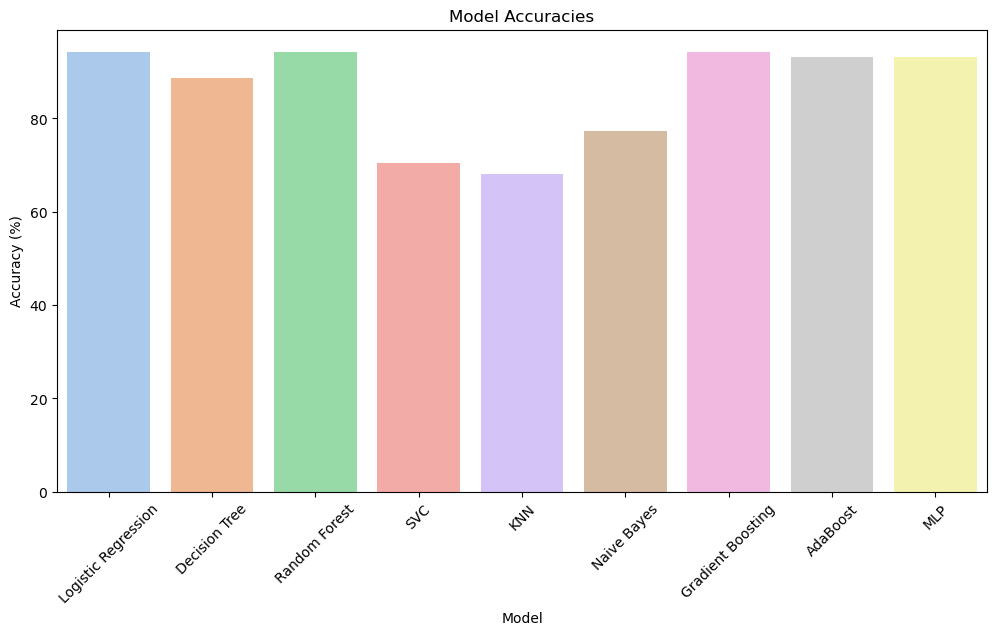

+---------------------+--------------+-----------+--------+----------+
|        Model        | Accuracy (%) | Precision | Recall | F1 Score |
+---------------------+--------------+-----------+--------+----------+
| Logistic Regression |    94.32     |   0.897   | 0.929  |  0.912   |
|    Decision Tree    |    88.64     |    0.75   | 0.964  |  0.844   |
|    Random Forest    |    94.32     |   0.897   | 0.929  |  0.912   |
|         SVC         |    70.45     |    0.75   | 0.107  |  0.188   |
|         KNN         |    68.18     |    0.0    |  0.0   |   0.0    |
|     Naive Bayes     |    77.27     |   0.583   |  1.0   |  0.737   |
|  Gradient Boosting  |    94.32     |   0.871   | 0.964  |  0.915   |
|       AdaBoost      |    93.18     |   0.893   | 0.893  |  0.893   |
|         MLP         |    93.18     |   0.867   | 0.929  |  0.897   |
+---------------------+--------------+-----------+--------+----------+

Best Model: Gradient Boosting
Classification Report:
              precision

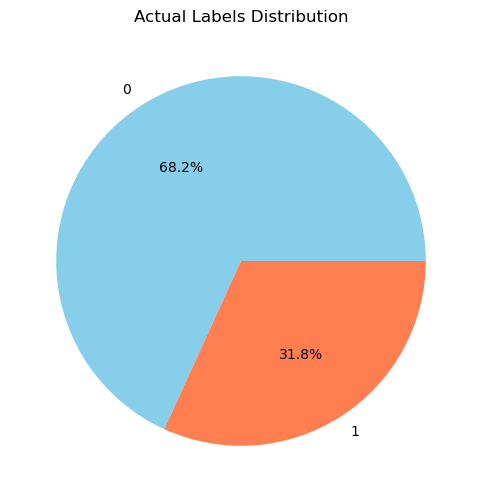

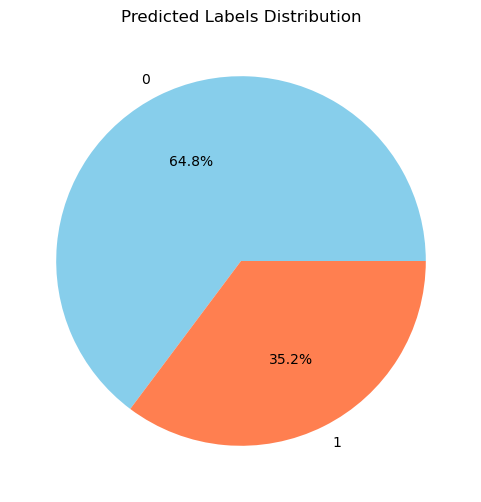

In [13]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(df.drop('spam', axis=1))  # Ensure proper one-hot encoding
y = df['spam']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Align the test set to have the same columns as the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

# Evaluate each model
results = []
best_model = None
best_score = 0
best_model_name = None  # Added initialization for best_model_name

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100  # Multiply by 100 to show accuracy as a percentage
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    })
    
    # Save the best model based on F1 score
    if f1 > best_score:
        best_score = f1
        best_model = model
        best_model_name = model_name

# Save the best model after evaluating all models
if best_model is not None:
    # Save the best model
    pickle.dump(best_model, open(f'Models/{best_model_name}_Best_Model.pkl', 'wb'))
    joblib.dump(best_model, f'Models/{best_model_name}_Best_Model.joblib')

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot accuracies of all models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='pastel')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.savefig("Plots\Models\Columns\Model_Accuracies.png")
plt.show()

# Create a PrettyTable object to display the results
table = PrettyTable()

# Set the column names
table.field_names = ["Model", "Accuracy (%)", "Precision", "Recall", "F1 Score"]

# Add rows for each model's metrics
for index, row in results_df.iterrows():
    table.add_row([row['Model'], round(row['Accuracy'], 2), round(row['Precision'], 3), round(row['Recall'], 3), round(row['F1 Score'], 3)])

# Print the table
print(table)

# Ensure the best model's predictions are stored
y_pred_best = best_model.predict(X_test)

# Print best model and its metrics
print(f"\nBest Model: {best_model_name}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Plot Pie Charts for Actual vs Predicted Labels for the best model
# Pie chart for Actual Labels
actual_counts = y_test.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', colors=['skyblue', 'coral'])
plt.title('Actual Labels Distribution')
plt.savefig("Plots\Models\Columns\Actual_Labels_Distribution.png")
plt.show()

# Pie chart for Predicted Labels
predicted_counts = pd.Series(y_pred_best).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', colors=['skyblue', 'coral'])
plt.title('Predicted Labels Distribution')
plt.savefig("Plots\Models\Columns\Predicted_Labels_Distribution.png")
plt.show()


### Training and Testing with only Email Text Column for easier deployment

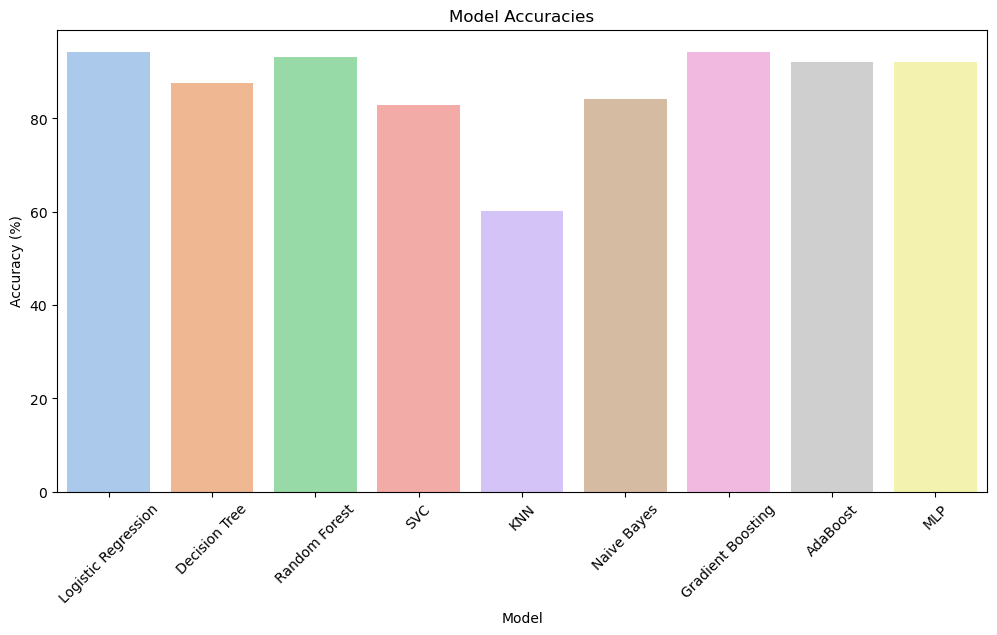

+---------------------+--------------+-----------+--------+----------+
|        Model        | Accuracy (%) | Precision | Recall | F1 Score |
+---------------------+--------------+-----------+--------+----------+
| Logistic Regression |    94.32     |   0.871   | 0.964  |  0.915   |
|    Decision Tree    |     87.5     |   0.774   | 0.857  |  0.814   |
|    Random Forest    |    93.18     |   0.844   | 0.964  |   0.9    |
|         SVC         |    82.95     |   0.783   | 0.643  |  0.706   |
|         KNN         |    60.23     |   0.444   |  1.0   |  0.615   |
|     Naive Bayes     |    84.09     |   0.675   | 0.964  |  0.794   |
|  Gradient Boosting  |    94.32     |   0.871   | 0.964  |  0.915   |
|       AdaBoost      |    92.05     |   0.862   | 0.893  |  0.877   |
|         MLP         |    92.05     |    0.8    |  1.0   |  0.889   |
+---------------------+--------------+-----------+--------+----------+

Best Model: Logistic Regression
Classification Report:
              precisi

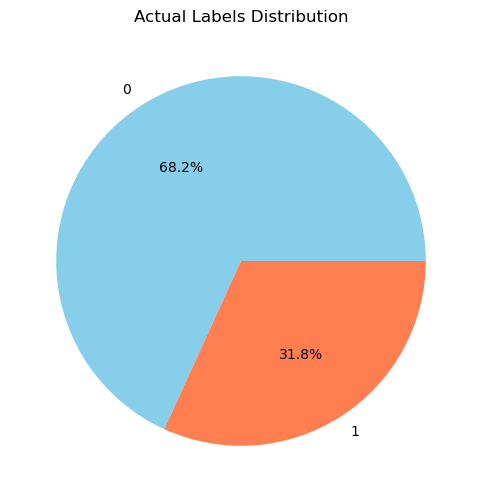

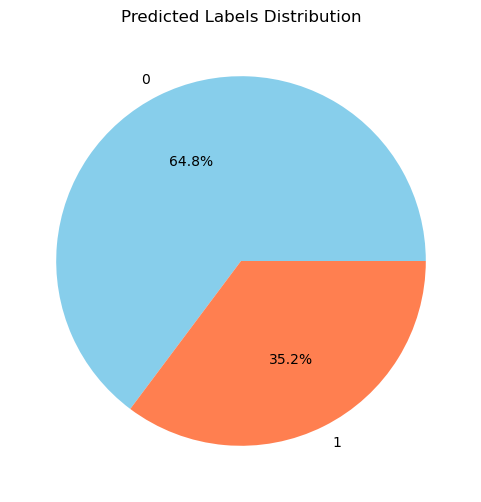

In [11]:
# Set random seeds for reproducibility
np.random.seed(42)

# Extract the relevant column (Email Text) and the target (spam)
X_raw = df['Email Text']  # Use only the Email Text column
y = df['spam']

# Convert text data into numeric features using TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # Customize max_features as needed
X_sparse = tfidf.fit_transform(X_raw)  # Sparse matrix

# Convert sparse matrix to dense array
X = X_sparse.toarray()  # Convert to dense format

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

# Evaluate each model
results = []
best_model = None
best_score = 0
best_model_name = None

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    })
    
    # Save the best model
    if f1 > best_score:
        best_score = f1
        best_model = model
        best_model_name = model_name

# Save the best model
if best_model is not None:
    pickle.dump(best_model, open(f'Models/{best_model_name}_Text_Best_Model.pkl', 'wb'))
    joblib.dump(best_model, f'Models/{best_model_name}_Best_Text_Model.joblib')

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot accuracies of all models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='pastel')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.savefig("Plots\Models\Text\Model_Accuracies.png")
plt.show()

# Display results using PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy (%)", "Precision", "Recall", "F1 Score"]
for index, row in results_df.iterrows():
    table.add_row([row['Model'], round(row['Accuracy'], 2), round(row['Precision'], 3), round(row['Recall'], 3), round(row['F1 Score'], 3)])
print(table)

# Predictions for the best model
y_pred_best = best_model.predict(X_test)
print(f"\nBest Model: {best_model_name}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Plot pie charts
# Actual Labels
actual_counts = y_test.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', colors=['skyblue', 'coral'])
plt.title('Actual Labels Distribution')
plt.savefig("Plots\Models\Text\Actual_Labels_Distribution.png")
plt.show()

# Predicted Labels
predicted_counts = pd.Series(y_pred_best).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', colors=['skyblue', 'coral'])
plt.title('Predicted Labels Distribution')
plt.savefig("Plots\Models\Text\Predicted_Labels_Distribution.png")
plt.show()


In [14]:
# Save the tfidf vector model
if tfidf is not None:
    pickle.dump(tfidf, open(f'Models/tfidf_vectorizer.pkl', 'wb'))
    joblib.dump(tfidf, f'Models/tfidf_vectorizer.joblib')

print(f"TF-IDF vectorizer saved.")


TF-IDF vectorizer saved.
